# D3: Data-Driven Documents

<a href="https://d3js.org">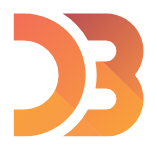</a>


**D3** (or **D3.js**) is a free, open-source JavaScript library for visualizing data. Its low-level approach built on web standards offers unparalleled flexibility in authoring dynamic, data-driven graphics. For more than a decade D3 has powered groundbreaking and award-winning visualizations, become a foundational building block of higher-level chart libraries, and fostered a vibrant community of data practitioners around the world.

## Resources

* [Documentation](https://d3js.org)
* [Examples](https://observablehq.com/@d3/gallery)

What is D3?
D3 (or D3.js) is a free, open-source JavaScript library for visualizing data. Its low-level approach built on web standards offers unparalleled flexibility in authoring dynamic, data-driven graphics. For more than a decade D3 has powered groundbreaking and award-winning visualizations, become a foundational building block of higher-level chart libraries, and fostered a vibrant community of data practitioners around the world.

D3 “slingshotted the field into growth, diversification and creativity that has been unprecedented” and “changed how millions of data visualizations are created across newsrooms, websites, and personal portfolios,” remarked the Information is Beautiful 2022 Test of Time Award. The IEEE VIS 2021 Test of Time Award noted, “By creating a framework that was compelling and easy for web developers to use to author interactive visualizations, the authors have undeniably helped to bring data visualization to the mainstream. [D3] is a cornerstone contribution to this conference specifically and more generally to the success of our field as a whole.”

D3 was created by Mike Bostock in 2011. Mike co-authored the D3 paper with Jeff Heer and Vadim Ogievetsky at Stanford. Jason Davies made major contributions to D3 from 2011 to 2013, most notably to D3’s geographic projection system. Philippe Rivière has been a major contributor to D3 and its documentation since 2016. Over the years, countless kind individuals have contributed to D3 by sharing code and ideas, by teaching and answering questions, and by bringing people together to further the practice of visualization. Mike and Philippe now maintain D3 and Observable Plot at Observable.

In [1]:
import pandas as pd
import h2o
import psutil
from h2o.estimators.word2vec import H2OWord2vecEstimator

In [2]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
h2o.init(strict_version_check=False,max_mem_size=min_mem_size)

4
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\prabh\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\prabh\AppData\Local\Temp\tmpycyszmdx
  JVM stdout: C:\Users\prabh\AppData\Local\Temp\tmpycyszmdx\h2o_prabh_started_from_python.out
  JVM stderr: C:\Users\prabh\AppData\Local\Temp\tmpycyszmdx\h2o_prabh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,05 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,"21 days, 10 hours and 24 minutes"
H2O cluster name:,H2O_from_python_prabh_9ruyol
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [3]:
data_path = "data/stopwords.csv"

STOP_WORDS = pd.read_csv(data_path)
STOP_WORDS = list(STOP_WORDS['STOP_WORD'])
# STOP_WORDS

In [4]:
def tokenize(sentences, stop_word = STOP_WORDS):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(STOP_WORDS)),:]
    return tokenized_words

In [5]:
# text=pd.read_csv('data/text_column.csv')
text = h2o.import_file('data/AmazonReviews.Small.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
text['Text']

Text
"These are made in China (do not buy ANY pet food from China). Dogswell has been using propylene glycol to soften their treats (what are they thinkng?). Do not purchase or support this company in any way until they clean up their act. And for whatever reason Amazon doesn't allow returns of this item, so I had to toss mine out. Bad business all around on this one."
"Everything is ok, except it just isn't as good as it is in the bags. Just considerably more bland -- less lemon and less zing. Boring."
"Best cat treat ever. There isn't anything comparable to the love my cat has for these treats, he snubs away any other kind now.I know he likes to manipulate me with his cattiness but these treats are my way of manipulating him to come sit on my lap and have some chill time. :)"
"My two Corgis were thoroughly spoiled by my late husband (I spent a year and a half dieting them down a combined total of 25 pounds!)They are accustomed to the finest of fare, and they absolutely love the Wellness brand of treats."
We used to have drive down to the specialty pet food store for this product. So glad we discovered Amazon. As far as I can tell it is no more expensive & in some cases less - Prime membership is awesome. Loving Pets treats are some of the best according to my dog. They do not develop that nasty smell like some dog treats do.
"I really liked this coffee, it was just as good as everyone claimed it was. Strong, bold and flavorful! I would recommend!"
"I am always looking for healthier, whole grain versions of foods I enjoy. Unfortunately, these Peacock brand noodles are yet another food masquerading as healthy. The product title in big letters on the front says ""Brown Rice Vermicelli"", making the consumer think ""this is made with brown rice, so it should be a healthy choice"". But the first indication that it is not is when looking at the fiber content on the nutrition facts - only 0.6g per 2oz serving. Then onto the ingredients list to see why so low... contains brown rice, sago starch and water. The sago starch comes from palms and must not have much (if any) fiber.The Annie Chun's Maifun Brown Rice Noodles (sold on Amazon and in my local healthy grocer) has become one of my staples and is my frame of reference when comparing to the Peacock brand. The Annie Chun's product is made with 100% whole grain, with ingredients brown rice flour and water. Per 2oz serving, it has 4g fiber and pretty much the same calories and other nutrients as the Peacock brand.If you do try this Peacock brand noodles and have not used rice noodles before, you will need to seek guidance elsewhere on preparation. As others have pointed out, the Peacock package gives almost no directions on how to prepare the product, aside from a brief mention in the recipes (in the header text it does say that they are ""easy-to-cook"" but does not say how). It also contains a very strange recipe for rice noodles: Aglio Olio style - this is an Italian recipe for noodles with olive oil/garlic/sprinkled with grated cheese that I think would not be very tasty. The second recipe appears to be for a soup with veggie strips. Neither recipe gives amounts or much direction. In comparison, the Annie Chun's package gives clear, specific directions on rice noodle preparation and two recipes.I use rice noodles = maifun = rice sticks = sometimes called vermicelli for making the Vietnamese salad ""bun tofu"", to serve with stir-fried veggies or in lettuce rolls. They can also be used in spring rolls/egg rolls. When cooking with thin rice noodles, be careful not to oversoak/overcook/overmix or they tend to disintegrate. Asian rice noodle vermicelli (maifun) are not the same as Italian vermicelli and are not readily interchangeable. If making an Italian recipe, the best results would be expected from Italian pasta and not maifun.A few final notes... Both Peacock and Annie Chun's brown rice noodles are gluten free. The Peacock is made in Singapore and the Annie Chun's in Thailand. 

In [8]:
# text=text.ascharacter()
# text.describe()
text.describe()

Rows:55554
Cols:10




,ProductId,UserId,Summary,Score,HelpfulnessDenominator,Id,ProfileName,HelpfulnessNumerator,Time,Text
type,enum,enum,enum,int,int,int,enum,int,int,string
mins,,,,1.0,0.0,3.0,,0.0,944438400.0,NaN
mean,,,,4.185675198905569,2.2578032184901176,284454.85489793716,,1.7664614609209057,1296260730.3596504,NaN
maxs,,,,5.0,878.0,568436.0,,866.0,1351209600.0,NaN
sigma,,,,1.30775317084822,9.262838990830508,164193.91906608708,,8.63874239458031,47990174.93641189,NaN
zeros,,,,0,26415,0,,29722,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,B00141QYSQ,A1YS02UZZGRDCT,Do Not Buy,1.0,2.0,41471.0,Evan Eberhardt,2.0,1348358400.0,"These are made in China (do not buy ANY pet food from China). Dogswell has been using propylene glycol to soften their treats (what are they thinkng?). Do not purchase or support this company in any way until they clean up their act. And for whatever reason Amazon doesn't allow returns of this item, so I had to toss mine out. Bad business all around on this one."
1,B0089SPEO2,A3JOYNYL458QHP,Less lemon and less zing,3.0,0.0,28582.0,coleridge,0.0,1323907200.0,"Everything is ok, except it just isn't as good as it is in the bags. Just considerably more bland -- less lemon and less zing. Boring."
2,B001PMCDK2,A14TTMM0Z03Y2W,my cat goes crazy for these!,5.0,0.0,389965.0,Lindsay S. Bradford,0.0,1310601600.0,"Best cat treat ever. There isn't anything comparable to the love my cat has for these treats, he snubs away any other kind now.I know he likes to manipulate me with his cattiness but these treats are my way of manipulating him to come sit on my lap and have some chill time. :)"


In [9]:
text['Text']=text['Text'].ascharacter()

In [10]:
# Break reviews into sequence of words
words = tokenize(text["Text"])

In [11]:
words.head()

C1
made
china
buy
pet
food
china
dogswell
using
propylene
glycol


In [12]:
# words=words.drop(index=[1,3,5,7], axis=0)

In [13]:
w2v_model = H2OWord2vecEstimator(vec_size = 10, model_id = "w2v.hex")#, model_id = "w2v.hex"
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [27]:
w2v_model.find_synonyms('coffee', count=5)

OrderedDict([('expresso', 0.9729929566383362),
             ('diedrich', 0.9725878834724426),
             ('cofee', 0.9673582911491394),
             ('wakeup', 0.9651876091957092),
             ('coffe', 0.9634070992469788)])

In [28]:
w2v_model.find_synonyms('tea', count=5)

OrderedDict([('sleepytime', 0.9484767913818359),
             ('thunder', 0.9391429424285889),
             ('lipton', 0.9333216547966003),
             ('oolong', 0.9265167713165283),
             ('herbal', 0.9247453212738037)])

In [23]:
import json, random
import IPython.display
from IPython.core.display import display, HTML, Javascript
import json, random
from string import Template

In [33]:
stopwords = {
  "nodes": [
    {"id": "coffee", "group": 1},
    {"id": "expresso", "group": 1},
    {"id": "diedrich", "group": 1},
    {"id": "cofee", "group": 1},
    {"id": "wakeup", "group": 1},
    {"id": "coffe", "group": 1},
      {"id": "tea", "group": 2},
      {"id": "sleepytime", "group": 2},
      {"id": "thunder", "group": 2},
      {"id": "lipton", "group": 2},
      {"id": "oolong", "group": 2},
      {"id": "herbal", "group": 2},
  ],
    "links": [
    {"source": "expresso", "target": "coffee", "value": 0.9729929566383362},
    {"source": "diedrich", "target": "coffee", "value": 0.9725878834724426},
    {"source": "cofee", "target": "coffee", "value": 0.9673582911491394},
    {"source": "wakeup", "target": "coffee", "value": 0.9651876091957092},
    {"source": "coffe", "target": "coffee", "value": 0.9634070992469788},
    {"source": "sleepytime", "target": "tea", "value": 0.9484767913818359},
    {"source": "thunder", "target": "tea", "value": 0.9391429424285889},
    {"source": "lipton", "target": "tea", "value": 0.9333216547966003},
    {"source": "oolong", "target": "tea", "value": 0.9265167713165283},
    {"source": "herbal", "target": "tea", "value": 0.9247453212738037},
    ]
}
with open('word2vec_v1.json', 'w') as outfile:  
    json.dump(stopwords, outfile)

In [34]:
html_string = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>

.links line {
  stroke: #999;
  stroke-opacity: 0.6;
}

.nodes circle {
  stroke: #fff;
  stroke-width: 3px;
}

text {
  font-family: sans-serif;
  font-size: 12px;
}

</style>
<svg width="960" height="500"></svg>
"""
js_string="""
 require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
 });

  require(["d3"], function(d3) {

  var svg = d3.select("svg"),
    width = +svg.attr("width"),
    height = +svg.attr("height");

var color = d3.scaleOrdinal(d3.schemeCategory20);

var simulation = d3.forceSimulation()
    .force("link", d3.forceLink().distance(170).strength(0.5).id(function(d) { return d.id; }))
    .force("charge", d3.forceManyBody())
    .force("center", d3.forceCenter(width/2 , height/2 ));

d3.json("word2vec_v1.json", function(error, graph) {
  if (error) throw error;

  var link = svg.append("g")
      .attr("class", "links")
    .selectAll("line")
    .data(graph.links)
    .enter().append("line")
      .attr("stroke-width", function(d) { return Math.sqrt(d.value); });

  var node = svg.append("g")
      .attr("class", "nodes")
    .selectAll("g")
    .data(graph.nodes)
    .enter().append("g")
    
  var circles = node.append("circle")
      .attr("r", 8)
      .attr("fill", function(d) { return color(d.group); })
      .call(d3.drag()
          .on("start", dragstarted)
          .on("drag", dragged)
          .on("end", dragended));

  var lables = node.append("text")
      .text(function(d) {
        return d.id;
      })
      .attr('x', 6)
      .attr('y', 3);

  node.append("title")
      .text(function(d) { return d.id; });

  simulation
      .nodes(graph.nodes)
      .on("tick", ticked);

  simulation.force("link")
      .links(graph.links);

  function ticked() {
    link
        .attr("x1", function(d) { return d.source.x; })
        .attr("y1", function(d) { return d.source.y; })
        .attr("x2", function(d) { return d.target.x; })
        .attr("y2", function(d) { return d.target.y; });

    node
        .attr("transform", function(d) {
          return "translate(" + d.x + "," + d.y + ")";
        })
  }
});

function dragstarted(d) {
  if (!d3.event.active) simulation.alphaTarget(0.9).restart();
  d.fx = d.x;
  d.fy = d.y;
}

function dragged(d) {
  d.fx = d3.event.x;
  d.fy = d3.event.y;
}

function dragended(d) {
  if (!d3.event.active) simulation.alphaTarget(0);
  d.fx = null;
  d.fy = null;
}  
    
  });
 """
h = IPython.display.display(HTML(html_string))
j = IPython.display.Javascript(js_string)
IPython.display.display_javascript(j)

MIT License                                                                                                                                 <img src="https://opensource.org/wp-content/themes/osi/assets/img/osi-badge-light.svg" alt="image" align="right" width="300" height="300">

Copyright (c) 2024 Prabhu Subramanian

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.